In [1]:
# import the library
import numpy as np
import pandas as pd

#### Read and understand data

In [2]:
#load the csv file
df = pd.read_csv('column_2C_weka.csv')


In [3]:
# view the first five rows
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
# columns typee
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
# statistical summary
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


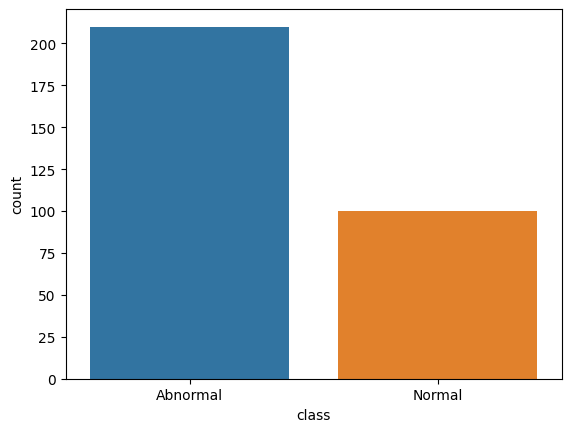

In [6]:
# we can see the count of two categories
# seaborn and matplotlib are data-viaualisation library
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(x='class' , data = df)
plt.show()

In [7]:
# values
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [8]:
#### Convert class to numeric
df['class_num'] = df['class'].map({'Abnormal':0,'Normal':1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
 7   class_num                 310 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 19.5+ KB


#### Assign X and Y

In [10]:
X = df[['pelvic_incidence','pelvic_tilt numeric',
        'lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]
y = df['class']
# y = df['class_num']

In [11]:
#X,y = df.loc[:,df.columns != 'class'], df.loc[:,'class']

#### Split into train and test

In [12]:
# import the library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [13]:
# check the shape
print(X_train.shape)
print(y_train.shape)

(217, 6)
(217,)


In [14]:
# check the shape
print(X_test.shape)
print(y_test.shape)

(93, 6)
(93,)


#### Import the library to create the model

In [15]:
# import the library
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 3)

#### Train the model

In [16]:
# train using fit
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#### Predict the results
y_pred = knn.predict(X_test)

#### Evaluate the model

In [18]:
## score
knn.score(X_test,y_test) # X_test is actual labels and y_pred is predicted label

0.8602150537634409

In [19]:
y_pred

array(['Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abno

In [20]:
type(y_pred)

numpy.ndarray

In [21]:
y_pred.shape

(93,)

In [22]:
y_test.shape

(93,)

In [23]:
y_pred = np.array(y_pred).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [24]:
y_pred.shape,y_test.shape

((93, 1), (93, 1))

In [25]:
## score
knn.score(X_test,y_pred) # y_test is actual labels and y_pred is predicted label

1.0

####  Confusion Matrix

In [26]:
# import the library 
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

In [28]:
# print confusion matrix
print(cm)

[[59  7]
 [ 6 21]]


In [29]:
# True negative = 59 (negative predicted as negative)
# True positive = 21 (positive predicted as positive)
# False positive = 7 (Negative classified as positive)
# False negative = 6 (Positive classified as negative )
##Correct prediction= 59+21=80
# Wrong prediction = 6+7=13
# total = 80+13 = 93
acc=80/93
acc

0.8602150537634409

In [30]:
#create classification report
cr = classification_report(y_test,y_pred)

In [31]:
# print classification report
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.91      0.89      0.90        66
      Normal       0.75      0.78      0.76        27

    accuracy                           0.86        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.86      0.86      0.86        93



In [32]:
# Precision tells us accuracy of positive prediction
# precission = TP/(TP+FP)
precision_normal = (21)/(21+7)
precision_normal

0.75

In [33]:
# Recall tells us fraction of corectly identified positive predictions
# recall = TP/TP+FN
recall_normal= 21/(21+6)
recall_normal

0.7777777777777778

In [34]:
# f1-score is harmonic mean of precision and recall
# f1-score = 2* (recall*precision)/recall + precsion
f1_score_normal = 2*0.75*0.78/(0.75+0.78)
f1_score_normal

0.7647058823529411